"""
Author: Manuel Aragones and Andrés Ponce de Leon Rosas
Date: June 2017
The following cheatsheet is entirely based on the "Natural Language 
Processing with Python" book from Steven Bird, Ewan Klein, 
and Edward Loper.
This workshop is constructed for the IBD workshop and is based on the Text Mining for Public Policy course at UofC, the Advanced Machine Learning for Public Policy and the NLTK book.
"""

In [29]:
# Reacapitulamos
str = 'Estamos en la casa del Instituto Belisario Domínguez'
print(str)

Estamos en la casa del Instituto Belisario Domínguez


In [30]:
# primer caracter
print(str[0])

str[0] =  E


In [31]:
# último caracter
print(str[-1])

str[-1] =  z


In [32]:
# del segundo al último
print(str[1:5])

str[1:5] =  stam


In [34]:
# del sexto al antepenúltimo
print(str[5:-2])

os en la casa del Instituto Belisario Domíngu


In [2]:
from platform import python_version
python_version()

'3.6.1'

In [14]:
import nltk
from nltk.book import *
from nltk.corpus import words

In [3]:
#To download the corpora
#nltk.download()

In [25]:
# text7.tokens

In [4]:
# Similar words
"""
Look for similar words: 
<text>.similar("<word>")
"""
text1.similar("good")

'\nLook for similar words: \n<text>.similar("<word>")\n'

In [ ]:
# Word context
"""
Examine the context shared by two or more words: 
"""
text2.common_contexts(["monstrous", "very"])

In [ ]:
# Ploting words ocurrence
"""
Plot the location of a word within a text: 
"""
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

In [ ]:
# Lenght of text
"""
Get the length of a variable:
"""
len(text1)

In [ ]:
# Set of unique wordss
"""
Get rid of duplicates:
"""
set(text3)

In [ ]:
# Lexical diversity
"""
Define a function that estimates the lexical diversity.
By dividing unique words over total words we can create
an indicator of the lexical richness:
unique_words = len(set(<varname>))
total_words = len(<varname>)
rich_index = unique_words / total_words
"""
def lexical_diversity(text):
        unique_words = len(set(text3))
        total_words = len(text3)
        rich_index = round((unique_words / total_words * 100), 2)
        print("Lexical diversity: {:.2f}%".format(rich_index))

lexical_diversity(text3)

In [ ]:
# Word count & share
"""
Define a function that estimates the "market" share of a word
Count or obtain share of the number of times a word appears 
in a text:
word_count = <varname>.count(<"word">)
word_share = <varname>.count(<"word">) / len(<varname>)
"""
def word_share(text, word):
    word_count = text.count(word)
    word_share = text.count(word) / len(text) * 100
    print("Word count: {:.2f} \nWord share: {:.2f}%".format(word_count, word_share))

word_share(text3, "smote")

In [ ]:
# 3 Computing with Language: Simple Statistics

In [ ]:
## 3.1 Frequency Distributions

In [ ]:
# Frequency distribution
"""
To obtain the frequency of the words contained in a particular text
search for the NLTK function
"""
freq_dist = FreqDist(text1)


In [ ]:

# Most common words
"""
Print the n most common words using NLTK:
"""
FreqDist(text1).most_common(5)



In [ ]:
# Count a specific word (alternative method)
"""
To obtain the number of appearances of a word there is another method
within NLTK instead of using count:
FreqDist(<varname>)[<'word'>]
OR in 2 steps
freq_dist = FreqDist(<varname>)
freq_dist[<'word'>]
"""
FreqDist(text1)['and']

In [ ]:
# Count a specific word (alternative method)
"""
To obtain the number of appearances of a word there is another method
within NLTK instead of using count:
FreqDist(<varname>)[<'word'>]
OR in 2 steps
freq_dist = FreqDist(<varname>)
freq_dist[<'word'>]
"""
FreqDist(text1)['and']

In [ ]:

# Plot cumulative distribution
"""
To plot a cumulative distribution of 'n' number of words,
NLTK provides the following function:
FreqDist(<varname>).plot(<integer n>, cumulative = True)
"""
FreqDist(text1).plot(50, cumulative = True)

In [ ]:
# Words that repeat only once
"""
To obtain a list with words that appear only once in a text
the .hapaxes() function in NLTK is useful:
FreqDist(<varname>).hapaxes()
"""
FreqDist(text1).hapaxes()

In [ ]:
# 3.2 Fine-grained selection of words

In [ ]:
# Filter words based on length and/or frequency
"""
Sometimes it is useful to filter words based on a specific 
length. To do so, we can use a loop that iterates through the
original text and only adds a word to a new list if it is within
the specified length.
"""
def word_filter(text, min_len, max_len, min_freq):
    if (
        isinstance(min_len, int) == False or
        isinstance(max_len, int) == False or
        isinstance(min_freq, int) == False
        ):
            raise ValueError('conditions not an integer')
    
    l_filtered = [w for w in set(text) 
                    if (
                        len(w) >= min_len and
                        len(w) <= max_len and
                        FreqDist(text)[w] >= min_freq
                        )]
    return l_filtered

word_filter(text5, 10, 99, 2)

In [ ]:
# Search
"""
Search function with context (concordance): 
<varname>.concordance("<word>")
"""
text1.concordance("monstrous")

In [ ]:
# 3.3 Bigrams and Collocations

In [ ]:
# Bigrams
"""
Use the bigrams function from nltk
bigram: tuple of words, that is, word pairs
list(bigrams(<list_with_text>))
*it is important to specify the type == list to bigrams()
"""

from nltk import bigrams
list1 = ['more', 'is', 'said', 'than', 'done']
list(bigrams(list1))

In [ ]:
# Collocations
"""
collocation: sequence of words that occur together unusually often
<varname>.collocations()
"""
from nltk import collocations
text2.collocations()

In [ ]:
## 3.4 Counting other things

In [ ]:
# Frequency distribution of the length of words
"""
To obtain a dictionary with the length of a word as a key and
the count of ocurrences the value, you can do the following:
"""
def FreqDist_of_length(text):
    l_lengths = [len(w) for w in text]
    return FreqDist(l_lengths)

def SampleDescriptives(text):
    fdist = FreqDist_of_length(text)
    print("The sample size is: {}".format(fdist.N()))
    l_unique_words = list(set(text))
    print("Sample unique words: {} ".format(len(l_unique_words)))
    print("The most common length is: {:.0f}".format(fdist.max()))
    print("It has a share of: {:.2f}%".format(fdist.freq(fdist.max())*100))
    print("Table 1: Length and frequencies".format(fdist.freq(fdist.max())*100))
    fdist.tabulate()
    fdist.plot()

SampleDescriptives(text1)

In [ ]:
# Table 3.1 From NLTK Book CHEATSHEET
"""
create a frequency distribution containing the given samples
fdist = FreqDist(samples)

increment the count for this sample
fdist[sample] += 1

count of the number of times a given sample occurred
fdist['monstrous']

frequency of a given sample
fdist.freq('monstrous')

total number of samples
fdist.N()

the n most common samples and their frequencies
fdist.most_common(n)

iterate over the samples
for sample in fdist:

sample with the greatest count
fdist.max()

tabulate the frequency distribution
fdist.tabulate()

graphical plot of the frequency distribution
fdist.plot()

cumulative plot of the frequency distribution
fdist.plot(cumulative=True)

update fdist1 with counts from fdist2
fdist1 |= fdist2

test if samples in fdist1 occur less frequently than in fdist2
fdist1 < fdist2
"""

In [ ]:
# Back to Python: Making Decisions and Taking Control

In [ ]:
## 4.1 Conditionals (Table 4.1)
"""
Operator and Relationship
<    less than
<=   less than or equal to
==   equal to (note this is two "=" signs, not one)
!=   not equal to
>    greater than
>=   greater than or equal to
"""

In [ ]:
## 4.2 Conditionals (Table 4.1)
"""
Function and Meaning
s.startswith(t) test if s starts with t
s.endswith(t)	test if s ends with t
t in s	test if t is a substring of s
s.islower()	test if s contains cased characters and all are lowercase
s.isupper()	test if s contains cased characters and all are uppercase
s.isalpha()	test if s is non-empty and all characters in s are alphabetic
s.isalnum()	test if s is non-empty and all characters in s are alphanumeric
s.isdigit()	test if s is non-empty and all characters in s are digits
s.istitle()	test if s contains cased characters and is titlecased (i.e. all words in s have initial capitals)
"""

In [ ]:
# Example
s = "4"
print(s.islower(),
      s.isalpha(),
      s.istitle(),
      s.isdigit())

In [ ]:
# Filter words II
"""
Filter words based on the aforementioned conditions
and other useful ones:
"""
sorted(w for w in text1 if w.endswith('ableness'))
sorted(w for w in text1 if 'able' in w)

l_example = sorted(set([w for w in text1 if 'cie' in w or 'cei' in w]))

for word in l_example:
    print(word, end=', ')

In [ ]:
## 4.1 Wordlist Corpora
"""
NLTK includes some corpora that are nothing more than wordlists.
Like: stopwords, commonly misspeled words, 
"""
stopwords = nltk.corpus.stopwords.words('english')

# extracting unusual words
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))



In [21]:
puzzle_letters = nltk.FreqDist('ads')

In [22]:
puzzle_letters

FreqDist({'a': 1, 'd': 1, 's': 1})

In [24]:
# Example to solve puzzle 
puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = nltk.corpus.words.words()
[w for w in wordlist if len(w) >= 5
                     and obligatory in w
                     and nltk.FreqDist(w) <= puzzle_letters]

['enrol',
 'ergon',
 'genro',
 'giver',
 'glore',
 'glover',
 'goner',
 'gorlin',
 'govern',
 'grein',
 'groin',
 'grove',
 'grovel',
 'ignore',
 'involver',
 'irone',
 'levir',
 'lienor',
 'liner',
 'linger',
 'liver',
 'livor',
 'livre',
 'longer',
 'lover',
 'lovering',
 'negro',
 'nigre',
 'noiler',
 'norie',
 'ogler',
 'oiler',
 'oriel',
 'overling',
 'regin',
 'region',
 'reign',
 'renvoi',
 'reoil',
 'revolving',
 'rigol',
 'ringe',
 'ringle',
 'rivel',
 'riven',
 'roving',
 'vergi',
 'vigor',
 'viner',
 'violer',
 'vireo',
 'virole',
 'viron',
 'viver']

In [ ]:
## 4.4 Shoebox and Toolbox Lexicons
"""
Collection of entries, where each entry is made up of one
or more fields. Most fields are optional or repeatable, which means that this kind of lexical resource cannot be treated as a table or spreadsheet.
"""
from nltk.corpus import swadesh
languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']
for i in [139, 140, 141, 142, 159]:
    print(swadesh.entries(languages)[i])

In [ ]:
# 5.1 Senses and Synonyms
# lists the different meanings a word can have
wn.synsets('car')
# lists the synonyms for a specific meaning
#wn.synset('car.n.01').lemma_names()

for w in wn.synsets('car'):
    print(w.lemma_names())
    print(w.definition())
    print()

In [ ]:
# 5.2 The WordNet Hierarchy
"""
WordNet synsets correspond to abstract concepts, and they don't
always have corresponding words in English.
Some concepts are very general, such as Entity, State, Event
these are called unique beginners or root synsets.
Hypernyms and hyponyms are called lexical relations because
they relate one synset to another.
"""
motorcar = wn.synset('car.n.01')
# Types of...
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[0], types_of_motorcar[1] 
# motorcar is of type:
motorcar.hypernyms()
[synset.name() for synset in motorcar.hypernym_paths()[0]]

In [ ]:
"""
Another important way to navigate the WordNet network
is from items to their components (meronyms) or to
the things they are contained in (holonyms). For 
example, the parts of a tree are its trunk, crown, 
and so on; the part_meronyms(). The substance a tree
is made of includes heartwood and sapwood; the
substance_meronyms(). A collection of trees forms
a forest; the member_holonyms():
"""
wn.synset('tree.n.01').part_meronyms()
wn.synset('tree.n.01').substance_meronyms()
wn.synset('tree.n.01').member_holonyms()

In [6]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud
def create_wordCloud(text_list, save=None):
    text_string = " ".join(text_list)
    wordcloud = WordCloud(background_color='white',width=2000,height=2000).generate(text_string)
    plt.figure()
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    
    if save is not None:  
        plt.savefig(save+'.png',dpi=300)
    else:
        plt.show()

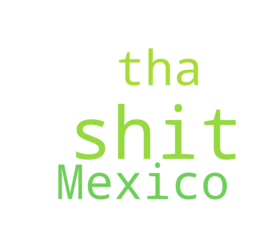

In [12]:
create_wordCloud(['Mexico', 'is', 'tha','shit', 'shit', 'shit'])

In [41]:
# to open a text file inside pwd
file_dir = '/Users/mbp/FP_IBD/pef_2017_1.txt'
file = open(file_dir,'r')
pef = file.read()

In [45]:
pef

In [49]:
import re
pef = re.sub('\n', ' ', pef)
pef

'Mié rcoles 30 de noviembre de 2016  DIARIO OFICIAL  (Segunda Sección)       SEGUNDA SECCION  PODER EJECUTIVO  SECRETARIA DE HACIENDA Y CREDITO PUBLICO  PRESUPUESTO de Egresos de la Federación para el E jercicio F is cal 2017. (Continúa en la Tercera Sección)  Al margen un sello con el Escudo Nacional, que dice: Estados Unidos Mexicanos. - Presidencia de la  República.  ENRIQUE PEÑA NIETO, Presidente de los Estados Unidos Mexicanos, a sus habitantes sabed:  Que la Cámara de Diputados del Honorable Congreso de la Unión, se ha servido dirigirme el siguiente  DECRETO  "LA CÁMARA DE DIPUTADOS DEL HONORABLE CONGRESO DE LA UN IÓN, EN EJERCICIO DE LA FACULTAD  QUE LE OTORGA LA FRACCIÓN IV DEL ARTÍCULO 74 DE LA CONSTITUCIÓN POLÍTICA DE LOS ESTADOS UNIDOS  MEXICANOS, D E C R E T A:  PRESUPUESTO DE EGRESOS DE LA FEDERACIÓN PARA EL EJERCICIO FISCAL 2017  DE LAS ASIGNACIONES DEL PRESUPUESTO DE EGRESOS DE LA FEDERACIÓN  TÍTULO PRIMERO  CAPÍTULO I  Disposiciones Generales  Artículo 1. El ejercicio, 

In [50]:
create_wordCloud(pef)

ValueError: We need at least 1 word to plot a word cloud, got 0.